/home/vincent/anaconda3/envs/simularity_evaluate/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vincent/anaconda3/envs/simularity_evaluate/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DISTS value for 107-1.png: 0.1570342779159546
DISTS value for 107-2.png: 0.22317850589752197
DISTS value for 107-3.png: 0.22205519676208496
DISTS value for 107-4.png: 0.16563200950622559
DISTS value for 2.png: 0.5105245113372803
DISTS value for 254201_2962_1__Nachtrag_I-images-0.png: 0.3219543695449829
DISTS value for 254271_865__Nachtrag_I.png: 0.35614120960235596
DISTS value for 320614_4252__Nachtrag_I-images-0.png: 0.3452415466308594
DISTS value for augmented_image_1.jpg: 0.38888734579086304
DISTS value for augmented_image_1_mit_bb.jpg: 0.40939944982528687
DISTS value for IMG_4272.jpg: 0.3911197781562805


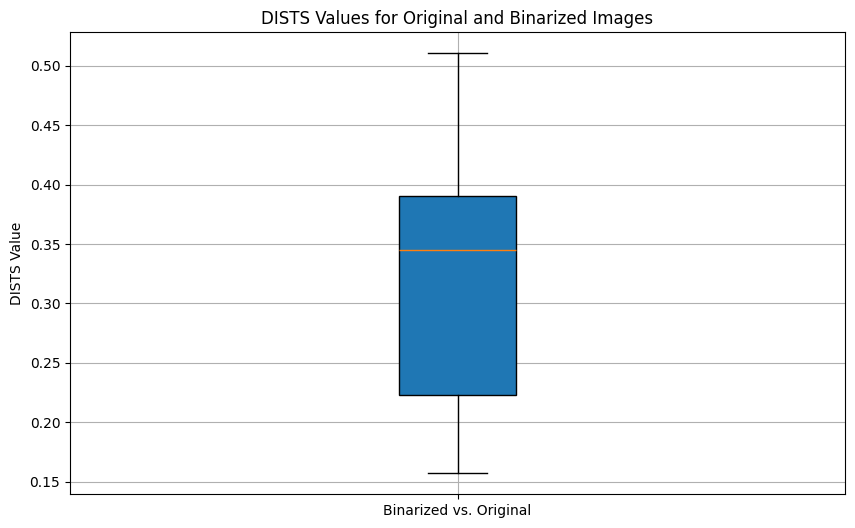

In [1]:
from DISTS_pytorch import DISTS
from torchvision import transforms
import os
from PIL import Image
import matplotlib.pyplot as plt

def prepare_image(image, resize=False):
    if resize and min(image.size) > 256:
        image = transforms.functional.resize(image, 256)
    image = transforms.ToTensor()(image)
    return image.unsqueeze(0)

def DISTS_analyze_and_plot(clean_image_path, dirty_image_path):
    D = DISTS()
    dists_values = []

    for file in os.listdir(clean_image_path):
        clean_image_full_path = os.path.join(clean_image_path, file)
        dirty_image_full_path = os.path.join(dirty_image_path, file)
        
        if not os.path.exists(clean_image_full_path):
            print(f"Clean image file does not exist: {clean_image_full_path}")
            continue
        
        if not os.path.exists(dirty_image_full_path):
            print(f"Dirty image file does not exist: {dirty_image_full_path}")
            continue

        clean_image = prepare_image(Image.open(clean_image_full_path).convert("RGB"))
        dirty_image = prepare_image(Image.open(dirty_image_full_path).convert("RGB"))

        dists_value = D(clean_image, dirty_image)
        dists_values.append(dists_value.item())
        print(f"DISTS value for {file}: {dists_value.item()}")
    
    # Boxplot erstellen
    plt.figure(figsize=(10, 6))
    plt.boxplot(dists_values, vert=True, patch_artist=True)
    plt.title('DISTS Values for Original and Binarized Images')
    plt.ylabel('DISTS Value')
    plt.xticks([1], ['Binarized vs. Original'])
    plt.grid(True)
    plt.show()

# Pfade zu den Bildverzeichnissen
clean_image_path = r'/home/vincent/Simularity_evaluate/Binarized/'
dirty_image_path = r'/home/vincent/Simularity_evaluate/Original/'

DISTS_analyze_and_plot(clean_image_path, dirty_image_path)
